In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import rc
import plotly.graph_objs as go
from sklearn import preprocessing
import matplotlib
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
#from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
import missingno as msno

In [2]:
#df = pd.read_csv('/Users/reema/Desktop/ML/vehicles.csv')

In [3]:
df = pd.read_csv('/Users/soaadaljafr/Downloads/vehicles.csv')

## EDA
### Data Exploring:

In [5]:
df.sample(6)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
362795,7306689158,https://abilene.craigslist.org/ctd/d/leander-2...,abilene,https://abilene.craigslist.org,22999,2007.0,ram,2500,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00q0q_dDrYmmvlUu...,CALL OR TEXT 512-914-8066 www.GETADIESEL.com...,NaN,tx,30.647630,-97.862949,2021-04-14T10:41:40-0500
8976,7308156209,https://flagstaff.craigslist.org/ctd/d/atlanta...,flagstaff / sedona,https://flagstaff.craigslist.org,34990,2020.0,jeep,wrangler sport suv 2d,good,6 cylinders,...,NaN,other,NaN,https://images.craigslist.org/00f0f_d8xhIBVcev...,Carvana is the safer way to buy a car During t...,NaN,az,33.779214,-84.411811,2021-04-17T04:40:37-0700
152931,7306366222,https://indianapolis.craigslist.org/ctd/d/indi...,indianapolis,https://indianapolis.craigslist.org,11995,2009.0,gmc,sierra 1500 sle,excellent,8 cylinders,...,NaN,truck,blue,https://images.craigslist.org/00m0m_kXO7aleTdV...,2009 GMC SIERRA Vehicle Information Make:...,NaN,in,39.684561,-86.133306,2021-04-13T16:47:29-0400
357216,7313726646,https://memphis.craigslist.org/ctd/d/memphis-2...,memphis,https://memphis.craigslist.org,19992,2016.0,bmw,3 series,NaN,4 cylinders,...,mid-size,sedan,custom,https://images.craigslist.org/00P0P_2k5WyKbX4c...,Most common questions about this vehicle: Wan...,NaN,tn,35.212885,-89.794298,2021-04-28T04:38:13-0500
424933,7307373000,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,21497,2013.0,ford,f-150,NaN,NaN,...,NaN,truck,black,https://images.craigslist.org/00Z0Z_gOYJdYRNIr...,Diamond Jim's West Allis address: 9706 W GR...,NaN,wi,43.016830,-88.033653,2021-04-15T15:01:36-0500
24019,7314314283,https://chico.craigslist.org/ctd/d/yuba-city-2...,chico,https://chico.craigslist.org,9499,2013.0,kia,sportage,NaN,4 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00v0v_Uy5V8nor3L...,This Kia Sportage can be yours today!If you ha...,NaN,ca,39.022483,-121.612859,2021-04-29T08:04:24-0700


## Data Cleaning:

In [84]:
df.isna().sum().dtype().to_frame()

TypeError: 'numpy.dtype[int64]' object is not callable

In [79]:
df.drop(['id', 'url','region_url', 'VIN', 'image_url', 'lat', 'long', 'description','county'], axis=1, inplace=True)

In [86]:
df.isnull().sum().to_frame()

,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400
title_status,8242


In [85]:
used_cars.describe(include=["object"]).T

,count,unique,top,freq
region,426880,404,columbus,3608
manufacturer,409234,42,ford,70985
model,421603,29667,f-150,8009
condition,252776,6,good,121456
cylinders,249202,8,6 cylinders,94169
fuel,423867,5,gas,356209
title_status,418638,6,clean,405117
transmission,424324,3,automatic,336524
drive,296313,3,4wd,131904
type,334022,13,sedan,87056


In [11]:
used_cars.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [12]:
used_cars.model.unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [13]:
used_cars1 = used_cars.dropna()

In [14]:
used_cars1.shape

(115988, 16)

In [15]:
used_cars1 = used_cars1[used_cars1['price']>0]

In [16]:
y = used_cars1['price']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

31         True
32         True
33         True
34         True
35         True
          ...  
426859    False
426860     True
426866     True
426874     True
426878     True
Name: price, Length: 111636, dtype: bool

In [17]:
print(removed_outliers.value_counts())

True     100768
False     10868
Name: price, dtype: int64


In [18]:
index_names = used_cars1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names)

Int64Index([   105,    260,    339,    342,    346,    365,    410,    413,
               437,    439,
            ...
            426773, 426774, 426775, 426776, 426778, 426798, 426800, 426857,
            426858, 426859],
           dtype='int64', length=10868)


In [19]:
#used_cars1.drop(index_names, inplace=True)

In [20]:
used_cars1 = used_cars1[['price','condition','region','year','manufacturer','model','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','state']]



/Users/soaadaljafr/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


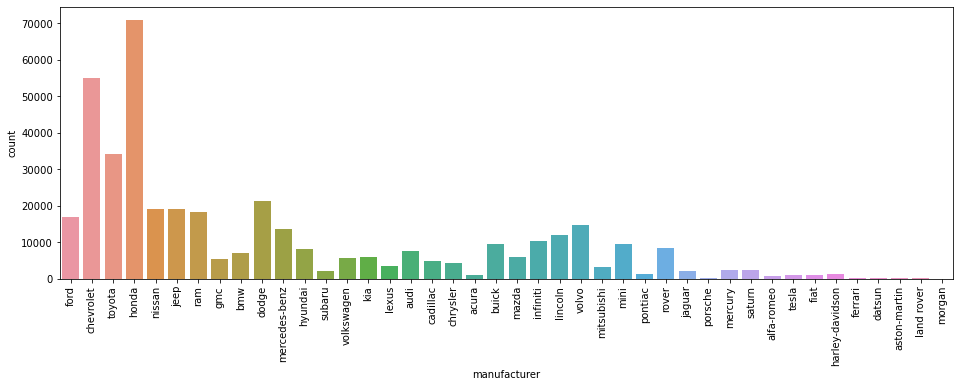

In [91]:
plt.figure(figsize=(16,5));
plt.colorbar= 
sns.countplot(df.manufacturer).set_xticklabels(labels=df.manufacturer.value_counts().index ,rotation=90);

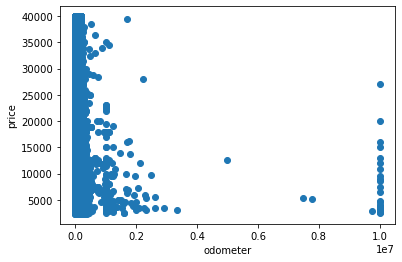

In [21]:
y = used_cars1['price']
x = used_cars1['odometer']
plt.scatter(x, y)
plt.xlabel('odometer')
plt.ylabel('price')
plt.show()

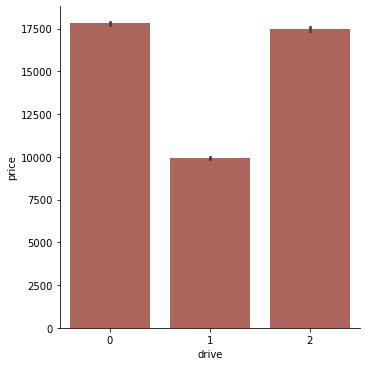

In [77]:
sns.catplot(x="drive", y="price",kind="bar",color="#B95C50", data=used_cars1, sort)

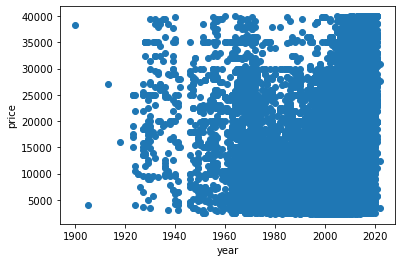

In [23]:
y = used_cars1['price']
x = used_cars1['year']
plt.scatter(x, y)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
used_cars1[['region','condition','manufacturer','model','cylinders','fuel','title_status','transmission','drive'
,'type','paint_color','state']] = used_cars1[['region','condition','manufacturer','model','cylinders','fuel','title_status','transmission','drive','type','paint_color','state']].apply(le.fit_transform)



In [26]:
#from sklearn.preprocessing import MinMaxScaler
#used_cars1["odometer"] = np.sqrt(preprocessing.minmax_scale(used_cars1["odometer"]))

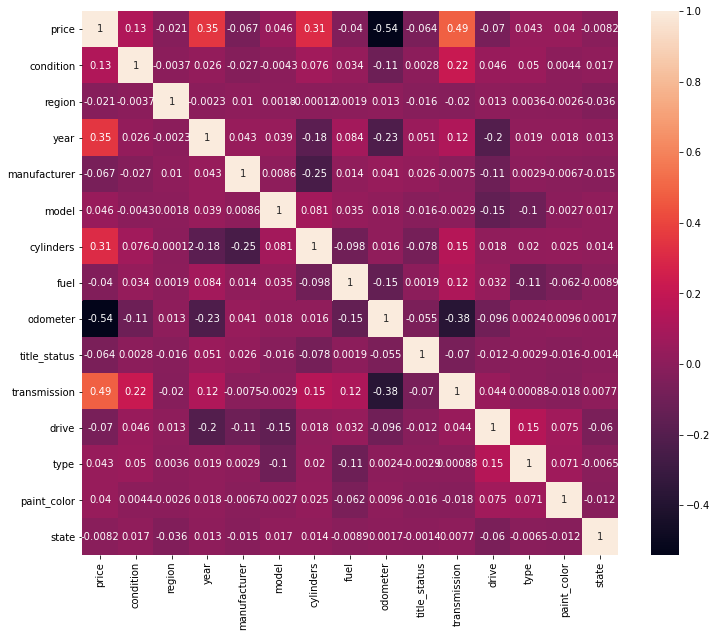

In [87]:
plt.figure(figsize=(12,10))
cor = used_cars1.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [28]:
seed=60
df_train, df_test= train_test_split(used_cars1, test_size=0.2, random_state=seed)
df_train, df_val= train_test_split(df_train, test_size=0.2, random_state=seed)
df_train.head()

,price,condition,region,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
48636,33995,0,285,2010.0,10,2386,6,2,0.047434,0,2,2,9,0,4
208069,29995,0,243,2017.0,7,8478,6,2,0.083606,0,0,0,8,5,22
370288,15500,2,72,2011.0,13,8189,6,2,0.121244,0,0,0,10,9,43
202905,4450,2,128,2006.0,12,4141,5,2,0.141067,0,0,2,10,10,22
44011,8900,0,262,2007.0,24,6433,3,2,0.083964,0,1,1,4,9,4


In [29]:
X_train1 = df_train.drop(['price'], axis = 1)
y_tran1 = df_train['price']

In [30]:
X_val1 = df_val.drop(['price'], axis = 1)
y_val1 = df_val['price']

In [42]:
X_test1 = df_test.drop(['price'], axis = 1)
y_test1 = df_test['price']

In [31]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False, interaction_only=False) 
X_train1_poly = poly.fit_transform(X_train1.values)
poly_model = LinearRegression()

In [32]:
poly_model.fit(X_train1_poly, y_tran1)
print(poly_model.score(X_train1_poly, y_tran1))

0.7373149328401798


In [33]:
poly = PolynomialFeatures(degree=5, include_bias=False, interaction_only=False) 
X_val1_poly = poly.fit_transform(X_val1.values)
poly_model = LinearRegression()

In [34]:
poly_model.fit(X_val1_poly, y_val1)
print(poly_model.score(X_val1_poly, y_val1))

0.8521733860133083


In [43]:
poly = PolynomialFeatures(degree=5, include_bias=False, interaction_only=False) 
X_test1_poly = poly.fit_transform(X_test1.values)
poly_model = LinearRegression()

In [44]:
poly_model.fit(X_test1_poly, y_test1)
print(poly_model.score(X_test1_poly, y_test1))

0.8754880184229343


In [45]:
lr = LinearRegression()
lr.fit(X_train1,y_tran1)

print(f"Training Score: {lr.score(X_train1,y_tran1)}")

Training Score: 0.5593792908218937


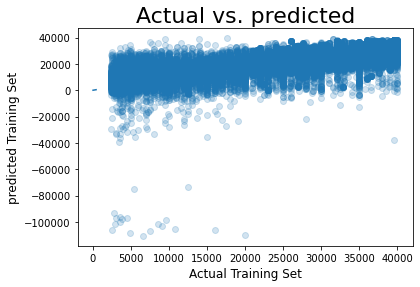

In [66]:
y_tran1_pred = lr.predict(X_train1)

plt.scatter(y_tran1, y_tran1_pred, alpha=0.2)#cross valid do train only 
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set', size=12)
plt.ylabel('predicted Training Set', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

In [46]:
lr = LinearRegression()
lr.fit(X_val1,y_val1)

print(f"Training Score: {lr.score(X_val1,y_val1)}")

Training Score: 0.5596224295729635


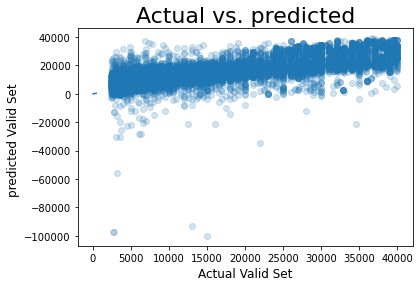

In [67]:
y_val1_pred = lr.predict(X_val1)#cross valid do train only 

plt.scatter(y_val1, y_val1_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Valid Set', size=12)
plt.ylabel('predicted Valid Set ', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

In [63]:
lr = LinearRegression()
lr.fit(X_test1,y_test1)

print(f"Training Score: {lr.score(X_test1,y_test1)}")

Training Score: 0.5709529203529073


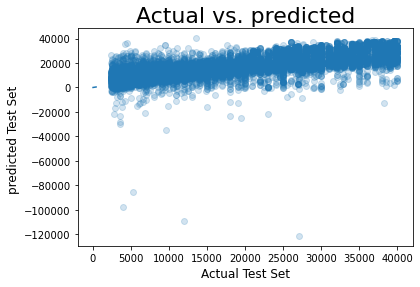

In [68]:
y_test1_pred = lr.predict(X_test1)#cross valid do train only 

plt.scatter(y_test1, y_test1_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Test Set', size=12)
plt.ylabel('predicted Test Set ', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [48]:
abmodel = AdaBoostRegressor()
abmodel.fit(X_train1 , y_tran1)
print(abmodel.score(X_train1 , y_tran1))

0.49858095592649276


In [49]:
abmodel = AdaBoostRegressor()
abmodel.fit(X_val1 , y_val1)
print(abmodel.score(X_val1 , y_val1))

0.5756806341116014


## Ridg

In [71]:
scaler = StandardScaler()

X_train1_scaled = scaler.fit_transform(X_train1.values)
#X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [72]:
red_model.fit(X_train1_scaled, y_tran1)

#print(f'Ridge Regression validation Score: {red_model.score(X_val_scaled, y_val):.8f}')
print(f'Ridge Regression Training Score: {red_model.score(X_train1_scaled, y_tran1):.8f}')

Ridge Regression Training Score: 0.55937929


In [73]:
scaler = StandardScaler()

X_val1_scaled = scaler.fit_transform(X_val1.values)
#X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [74]:
red_model.fit(X_val1_scaled, y_val1)

#print(f'Ridge Regression validation Score: {red_model.score(X_val_scaled, y_val):.8f}')
print(f'Ridge Regression Training Score: {red_model.score(X_val1_scaled, y_val1):.8f}')

Ridge Regression Training Score: 0.55962243
